In [17]:
import pandas as pd

# Question 1

In [18]:
df = pd.read_csv('wine-full.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: >

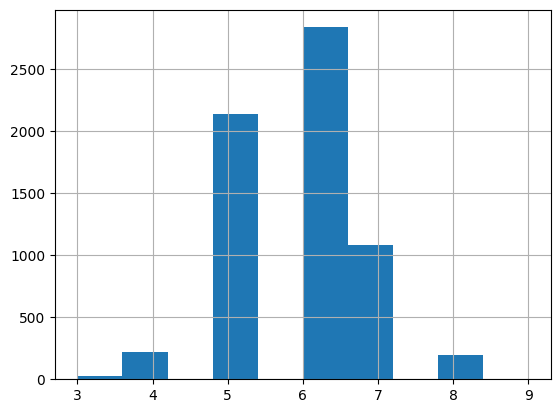

In [19]:
df['quality'].hist()

In [20]:
quality_counts = df['quality'].value_counts()
quality_counts

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [21]:
total_rows = len(df)
for quality, count in quality_counts.items():
    percentage = count / total_rows * 100
    print("Quality ", quality, " percentage of values: ", percentage, "%")

Quality  6  percentage of values:  43.650915807295675 %
Quality  5  percentage of values:  32.907495767277204 %
Quality  7  percentage of values:  16.60766507618901 %
Quality  4  percentage of values:  3.3246113590888102 %
Quality  8  percentage of values:  2.9706018162228722 %
Quality  3  percentage of values:  0.46175157765122365 %
Quality  9  percentage of values:  0.07695859627520393 %


The quality scores are not balanced.
Looking at the distribution, most wines have quality scores of 5, 6, or 7. There are very few wines with quality 3, 4, 8, or 9, for 1,2 & 10 there are none.